In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# Set plot style for better visuals
sns.set_theme(style="whitegrid")

In [3]:
# Load the CSV files for Developed and Developing countries
developed_df = pd.read_csv("CO2_Developed Countries.csv")
developing_df = pd.read_csv("CO2_Developing Countries.csv")

# Display first few rows to check the data structure
print("Developed Countries Data:\n", developed_df.head())
print("\nDeveloping Countries Data:\n", developing_df.head())

Developed Countries Data:
    ObjectId    Country ISO2 ISO3      Indicator  \
0         1  Australia   AU  AUS  CO2 emissions   
1         2  Australia   AU  AUS  CO2 emissions   
2         3  Australia   AU  AUS  CO2 emissions   
3         4  Australia   AU  AUS  CO2 emissions   
4         5  Australia   AU  AUS  CO2 emissions   

                             Unit  \
0  Millions of Metric tons of CO2   
1  Millions of Metric tons of CO2   
2  Millions of Metric tons of CO2   
3  Millions of Metric tons of CO2   
4  Millions of Metric tons of CO2   

                                              Source CTS_Code       CTS_Name  \
0  OECD (2021), OECD Inter-Country Input-Output D...     ECNC  CO2 Emissions   
1  OECD (2021), OECD Inter-Country Input-Output D...     ECNC  CO2 Emissions   
2  OECD (2021), OECD Inter-Country Input-Output D...     ECNC  CO2 Emissions   
3  OECD (2021), OECD Inter-Country Input-Output D...     ECNC  CO2 Emissions   
4  OECD (2021), OECD Inter-Country Input-Ou

In [4]:
# Filter only rows where Unit is 'Millions of Metric tons of CO2'
developed_df = developed_df[developed_df['Unit'] == 'Millions of Metric tons of CO2']
developing_df = developing_df[developing_df['Unit'] == 'Millions of Metric tons of CO2']

# Drop unnecessary columns
columns_to_drop = ['ObjectId', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 
                   'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'Scale']
developed_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
developing_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Display the remaining columns
print("\nRemaining columns:\n", developed_df.columns)


Remaining columns:
 Index(['Country', 'Industry', 'F1995', 'F1996', 'F1997', 'F1998', 'F1999',
       'F2000', 'F2001', 'F2002', 'F2003', 'F2004', 'F2005', 'F2006', 'F2007',
       'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015',
       'F2016', 'F2017', 'F2018'],
      dtype='object')


In [5]:
def knn_impute(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    return df

developed_df = knn_impute(developed_df)
developing_df = knn_impute(developing_df)

# Check for null values after imputation
print("\nNull values in Developed Data:", developed_df.isnull().sum().sum())
print("Null values in Developing Data:", developing_df.isnull().sum().sum())



Null values in Developed Data: 0
Null values in Developing Data: 0


C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\2817990891.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\ArukshitaDubey\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


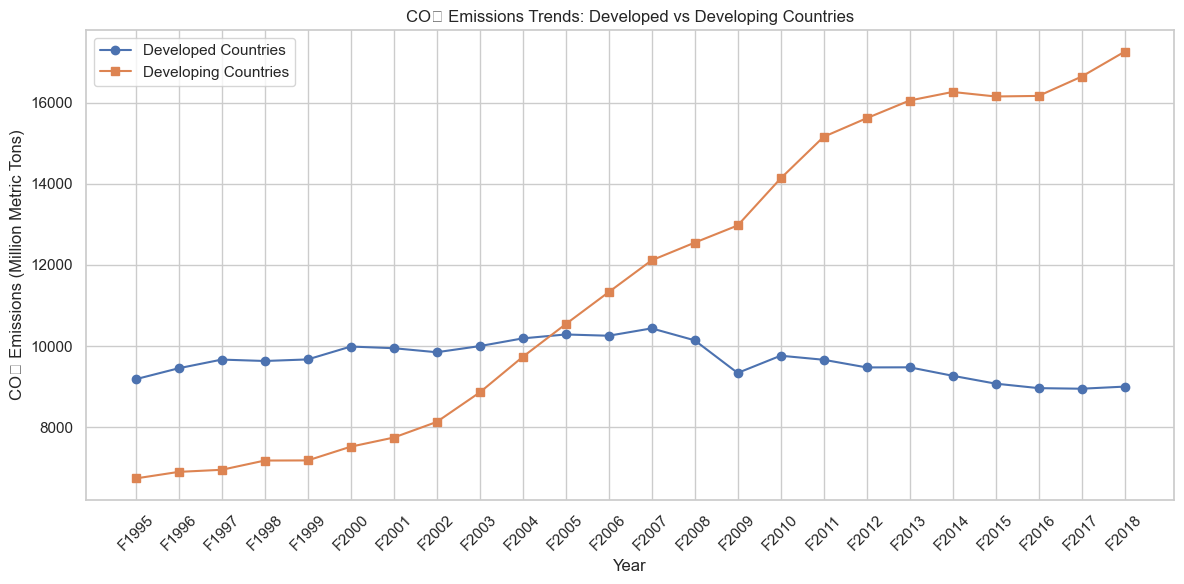

In [6]:
# Select only year columns for analysis
years = [col for col in developed_df.columns if col.startswith('F')]

# Sum CO₂ emissions across all countries for each year
developed_total = developed_df[years].sum()
developing_total = developing_df[years].sum()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(years, developed_total, label="Developed Countries", marker="o")
plt.plot(years, developing_total, label="Developing Countries", marker="s")
plt.title("CO₂ Emissions Trends: Developed vs Developing Countries")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\286190455.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\286190455.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\ArukshitaDubey\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


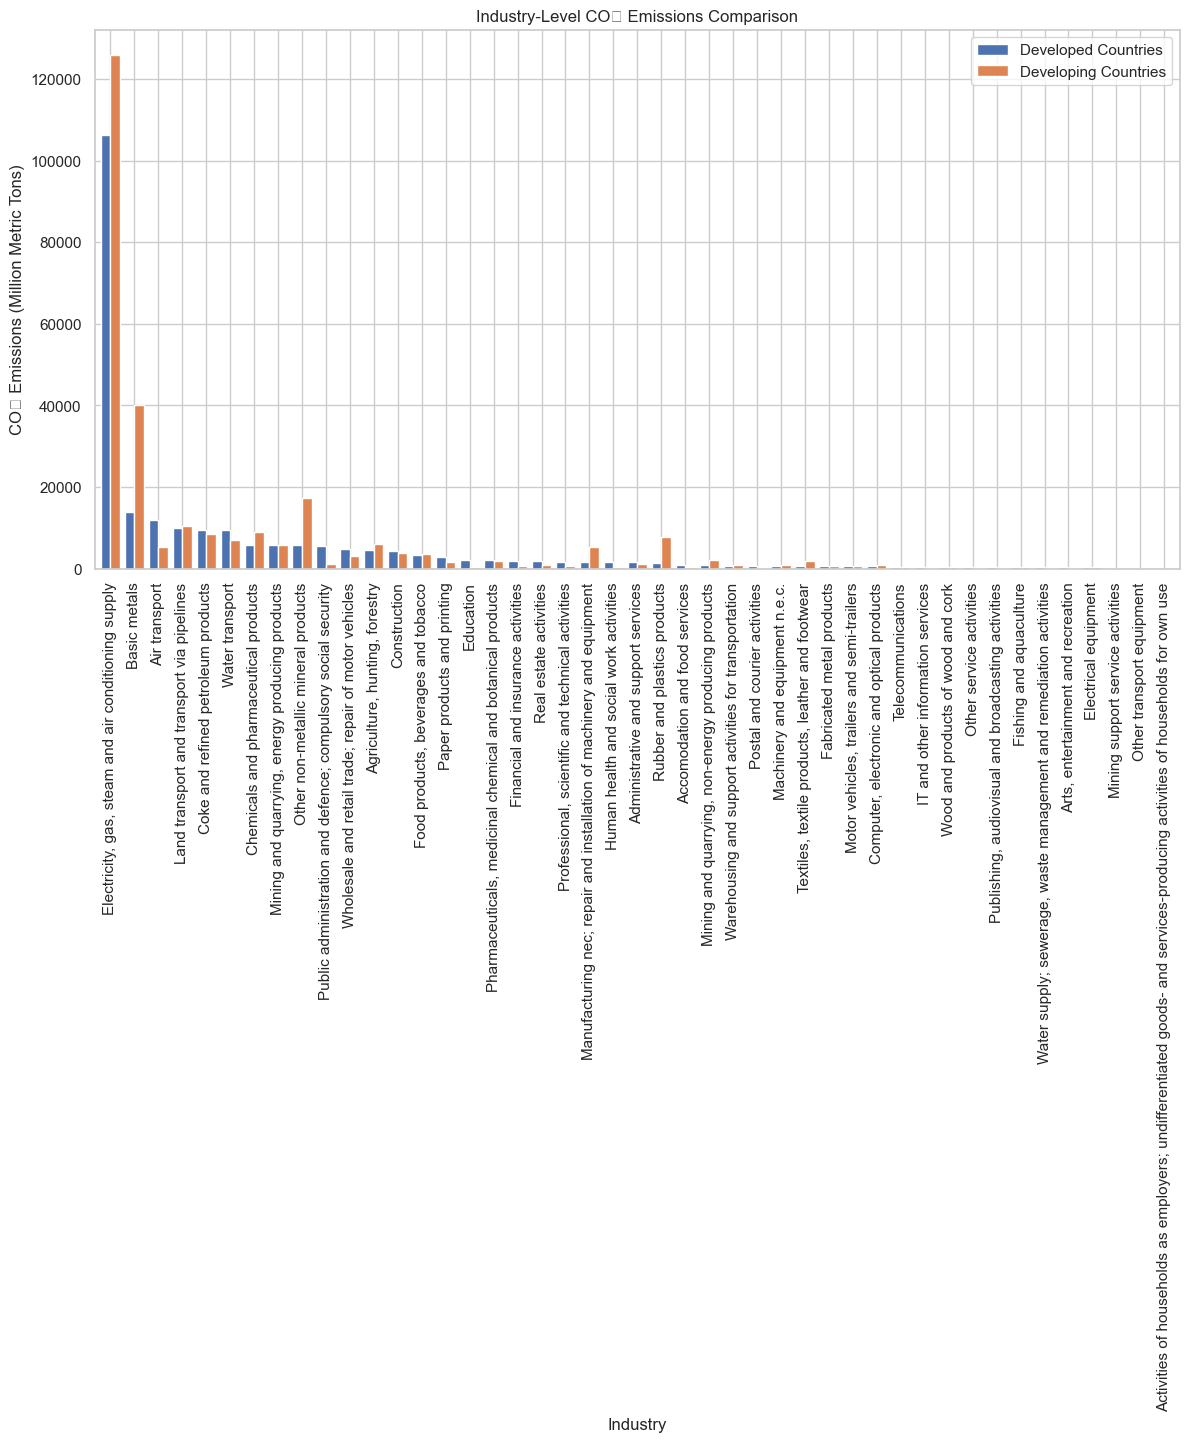

In [7]:
# Group emissions by Industry
industry_emissions_developed = developed_df.groupby("Industry")[years].sum().sum(axis=1)
industry_emissions_developing = developing_df.groupby("Industry")[years].sum().sum(axis=1)

# Combine the two for comparison
industry_comparison = pd.DataFrame({
    "Developed Countries": industry_emissions_developed,
    "Developing Countries": industry_emissions_developing
}).sort_values(by="Developed Countries", ascending=False)

# Plot industry-level emissions
industry_comparison.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title("Industry-Level CO₂ Emissions Comparison")
plt.xlabel("Industry")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
# Display basic statistics
print("Basic Statistics for Developed Countries:\n", developed_df.describe())
print("\nBasic Statistics for Developing Countries:\n", developing_df.describe())

Basic Statistics for Developed Countries:
              F1995        F1996        F1997        F1998        F1999  \
count  1665.000000  1665.000000  1665.000000  1665.000000  1665.000000   
mean      5.515900     5.678342     5.806226     5.785463     5.808668   
std      53.950563    55.523971    60.092204    61.472126    60.679594   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.039000     0.043000     0.042000     0.043000     0.044000   
50%       0.246000     0.275000     0.268000     0.277000     0.265000   
75%       1.578000     1.592000     1.622000     1.608000     1.612000   
max    2057.847000  2120.184000  2319.122000  2382.897000  2346.072000   

             F2000        F2001        F2002        F2003        F2004  ...  \
count  1665.000000  1665.000000  1665.000000  1665.000000  1665.000000  ...   
mean      5.999190     5.974804     5.914971     6.005866     6.120060  ...   
std      63.877933    64.693260    61.148678    61.91

In [14]:
# Identify key differences in industries contributing to CO₂ emissions
top_developed_industries = industry_emissions_developed.nlargest(5)
top_developing_industries = industry_emissions_developing.nlargest(5)

print("\nTop Contributing Industries - Developed Countries:\n", top_developed_industries)
print("\nTop Contributing Industries - Developing Countries:\n", top_developing_industries)


Top Contributing Industries - Developed Countries:
 Industry
Electricity, gas, steam and air conditioning supply    106138.855
Basic metals                                            13991.846
Air transport                                           12039.173
Land transport and transport via pipelines               9979.293
Coke and refined petroleum products                      9526.043
dtype: float64

Top Contributing Industries - Developing Countries:
 Industry
Electricity, gas, steam and air conditioning supply    125731.962
Basic metals                                            40147.991
Other non-metallic mineral products                     17432.549
Land transport and transport via pipelines              10598.949
Chemicals and pharmaceutical products                    9116.881
dtype: float64


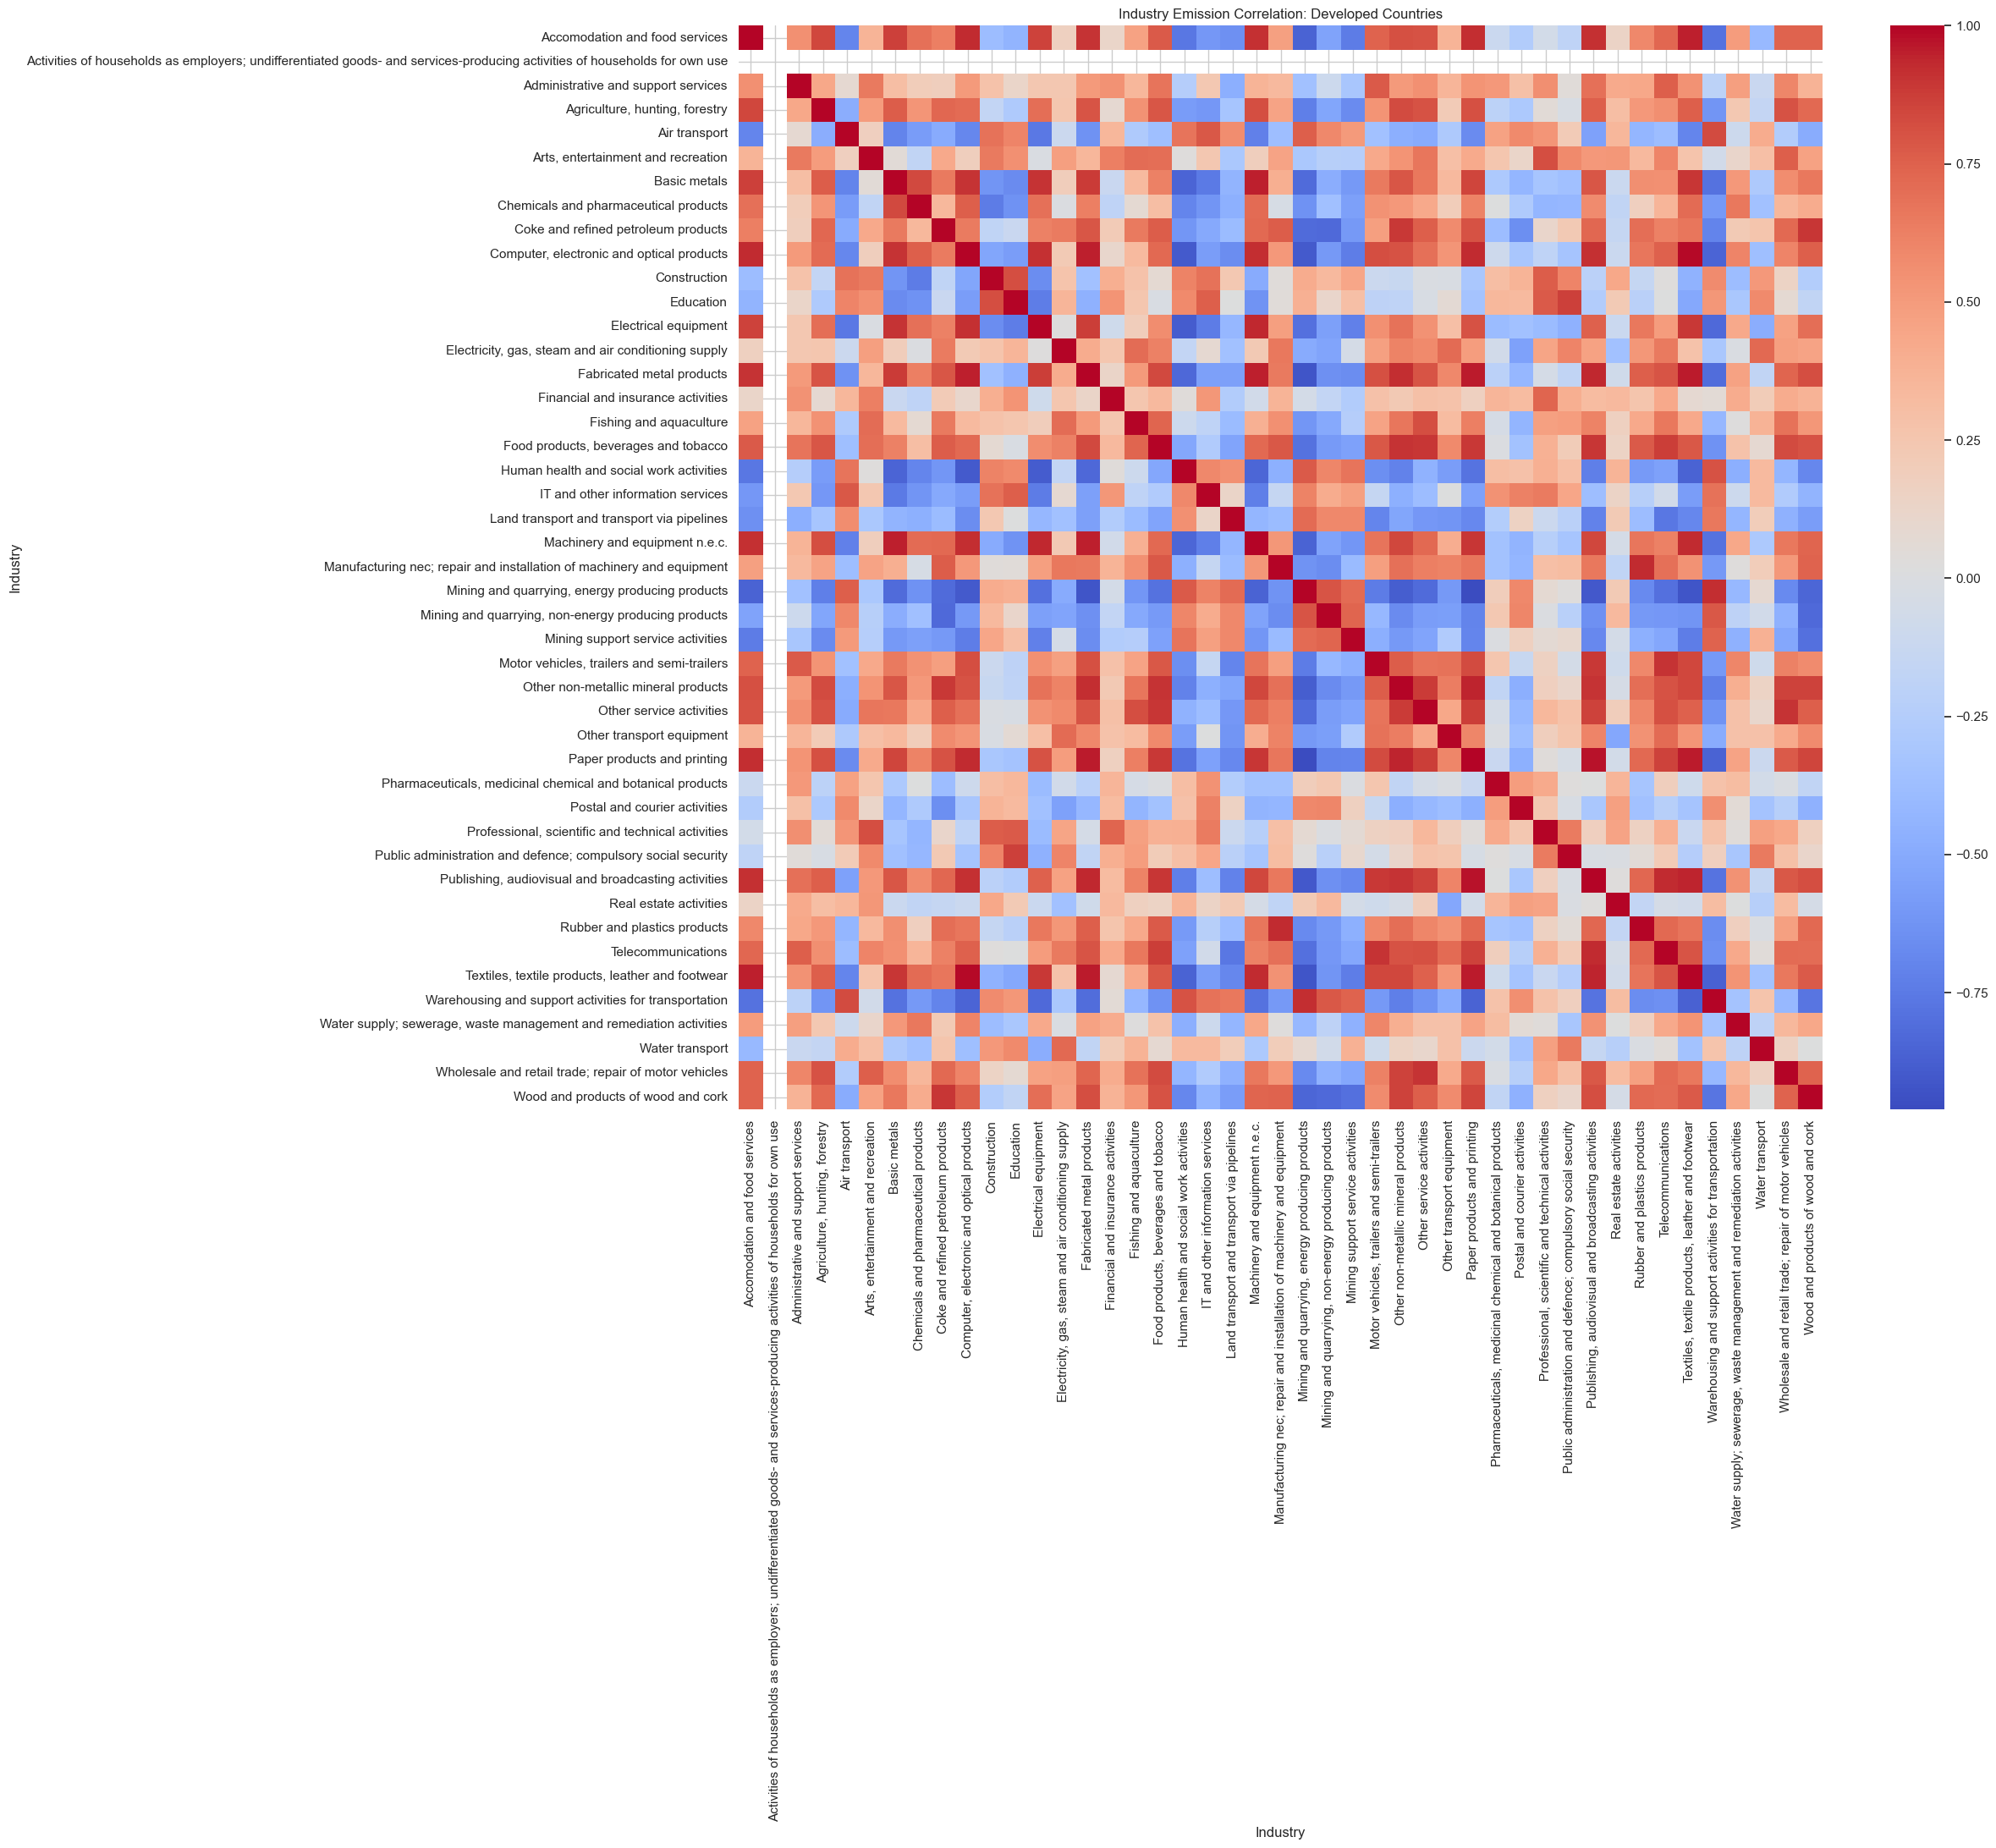

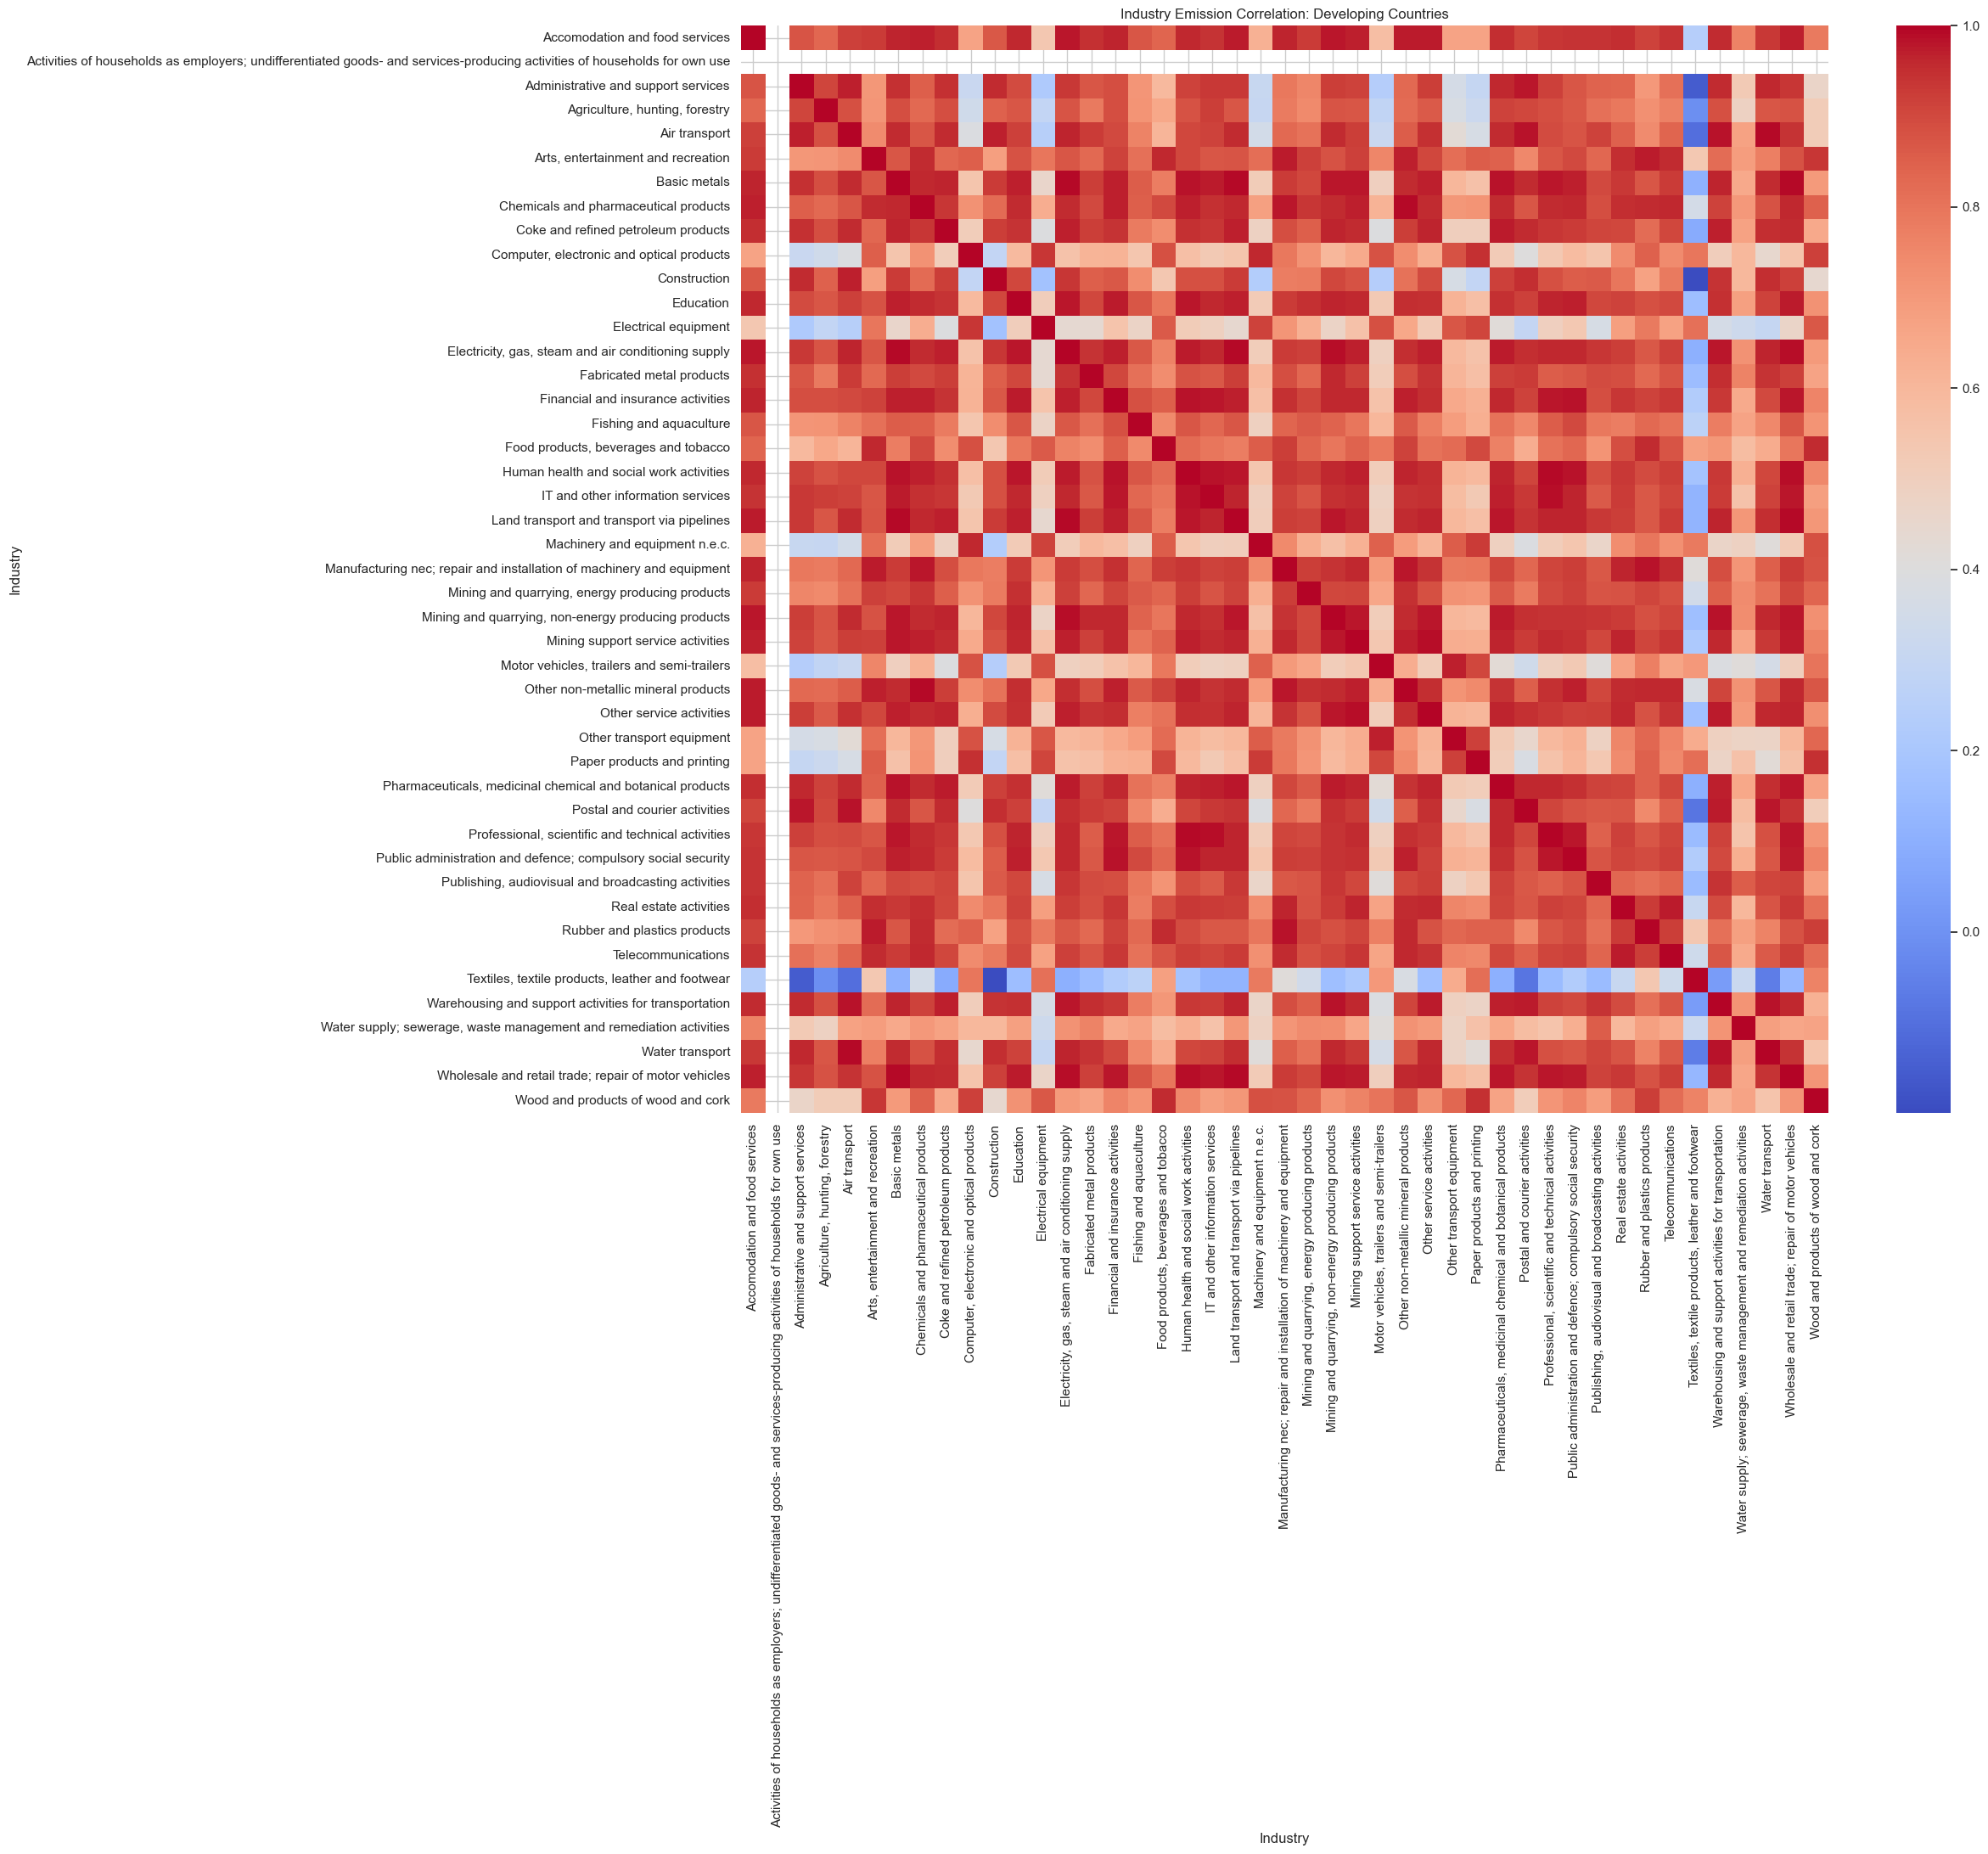

In [16]:
# Calculate the correlation matrix for industries in both datasets
industry_corr_developed = developed_df.groupby("Industry")[years].sum().T.corr()
industry_corr_developing = developing_df.groupby("Industry")[years].sum().T.corr()

# Plot heatmaps for correlation
plt.figure(figsize=(25, 22))
sns.heatmap(industry_corr_developed, annot=False, cmap="coolwarm", cbar=True)
plt.title("Industry Emission Correlation: Developed Countries")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 22))
sns.heatmap(industry_corr_developing, annot=False, cmap="coolwarm", cbar=True)
plt.title("Industry Emission Correlation: Developing Countries")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\3880742582.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()


<Figure size 2200x2200 with 0 Axes>

C:\Users\ArukshitaDubey\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


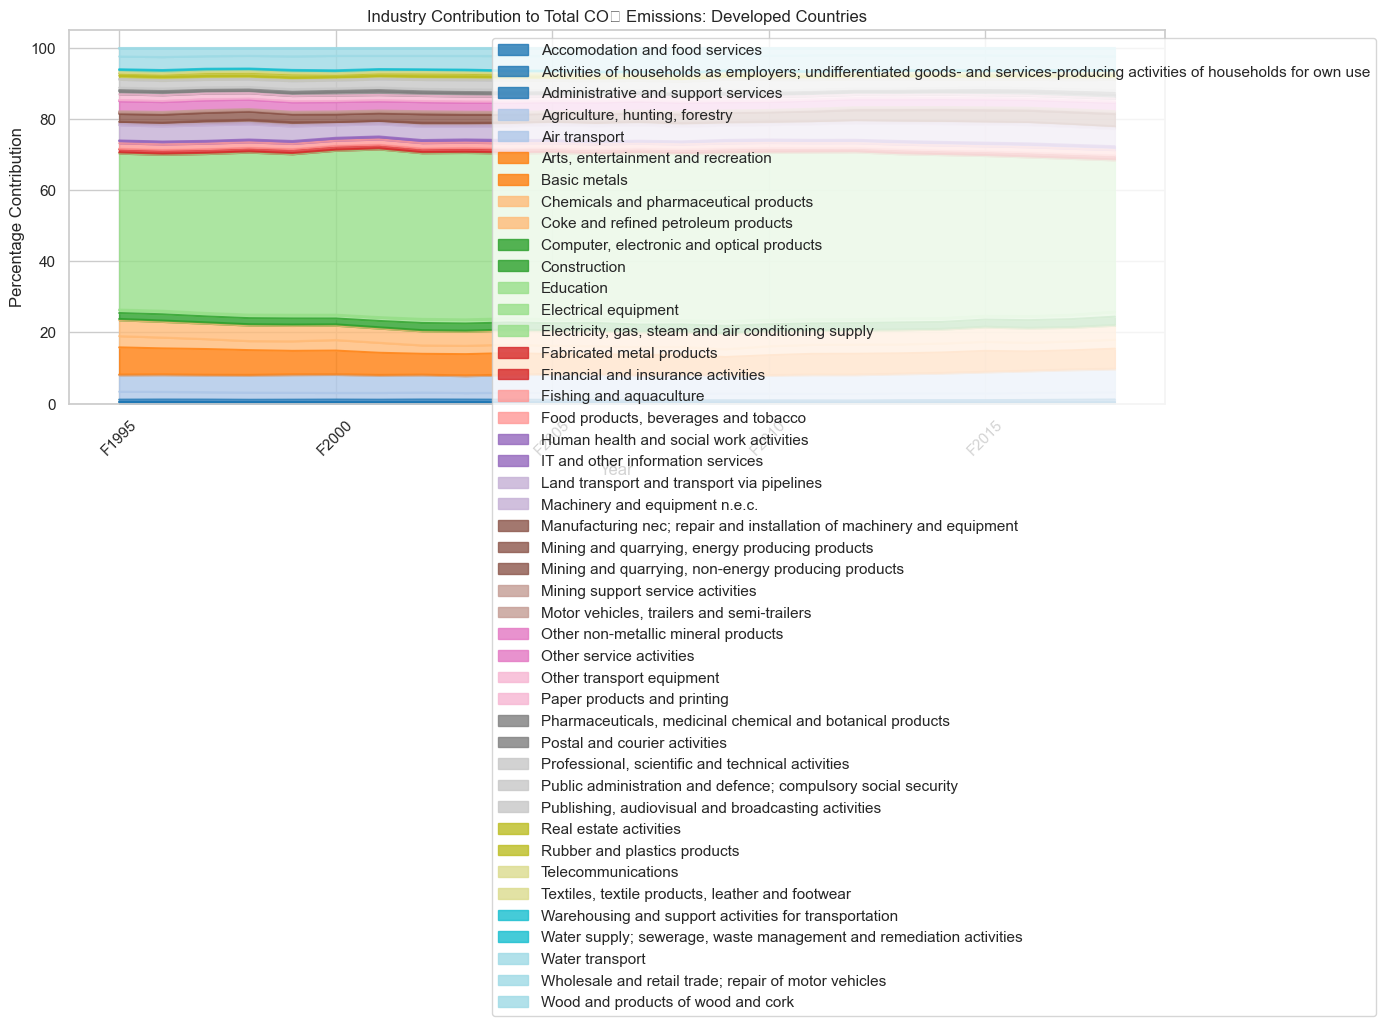

C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\3880742582.py:27: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()


<Figure size 2200x2200 with 0 Axes>

C:\Users\ArukshitaDubey\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


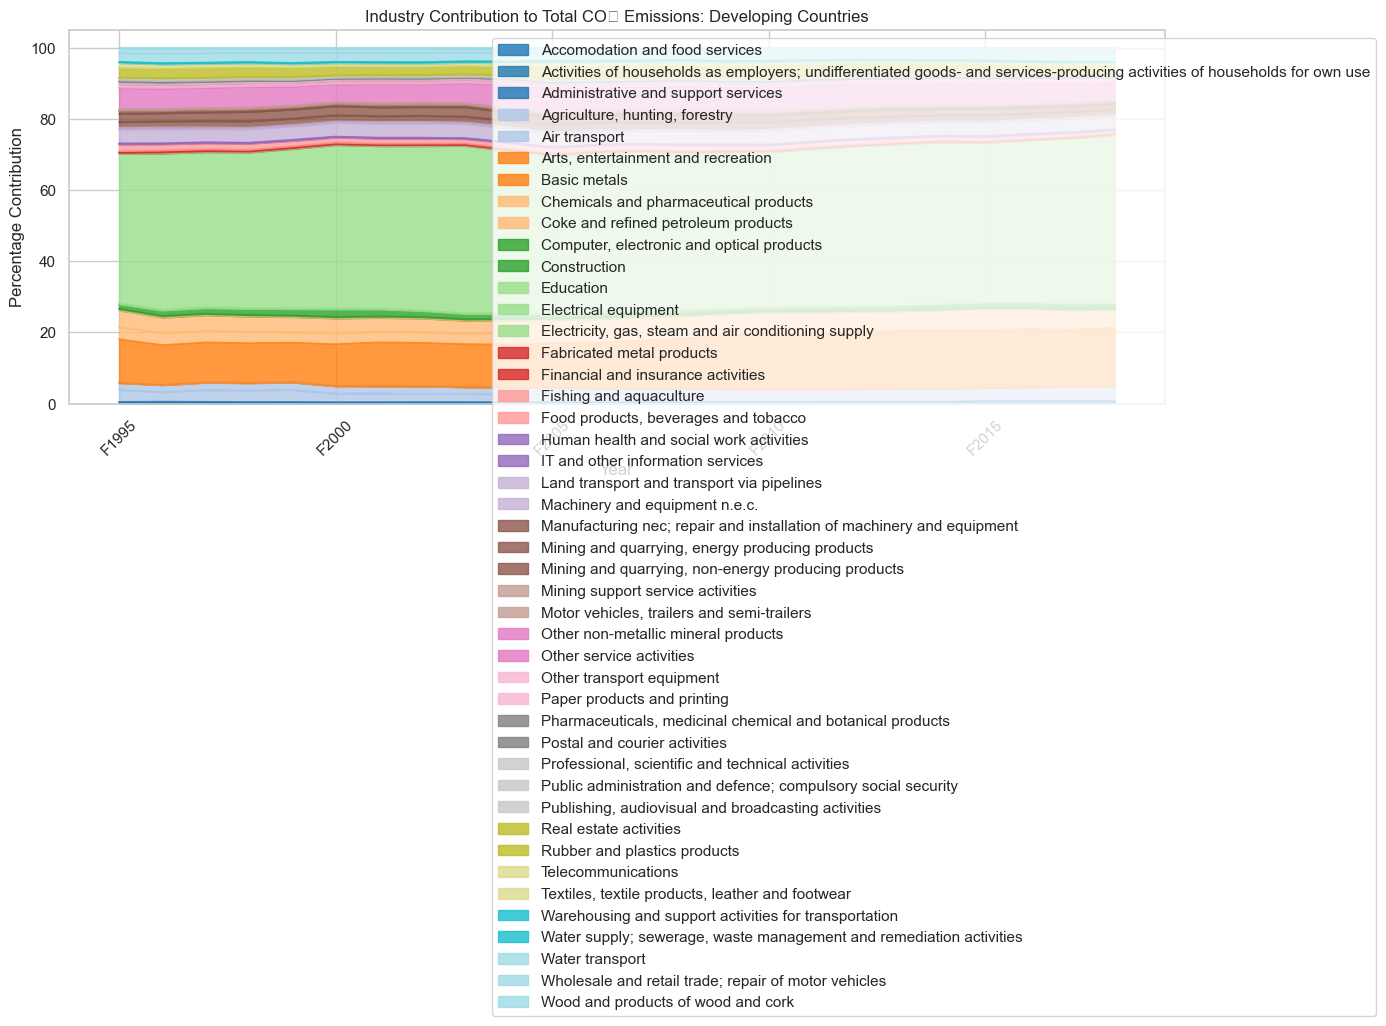

In [17]:
# Calculate total emissions by industry over time
developed_industry_trends = developed_df.groupby("Industry")[years].sum()
developing_industry_trends = developing_df.groupby("Industry")[years].sum()

# Normalize for percentage contributions
developed_industry_percent = developed_industry_trends.div(developed_industry_trends.sum(axis=0), axis=1) * 100
developing_industry_percent = developing_industry_trends.div(developing_industry_trends.sum(axis=0), axis=1) * 100

# Plot stacked area charts
plt.figure(figsize=(22, 22))
developed_industry_percent.T.plot.area(alpha=0.8, figsize=(14, 8), colormap="tab20")
plt.title("Industry Contribution to Total CO₂ Emissions: Developed Countries")
plt.xlabel("Year")
plt.ylabel("Percentage Contribution")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(22, 22))
developing_industry_percent.T.plot.area(alpha=0.8, figsize=(14, 8), colormap="tab20")
plt.title("Industry Contribution to Total CO₂ Emissions: Developing Countries")
plt.xlabel("Year")
plt.ylabel("Percentage Contribution")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\2091583585.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()


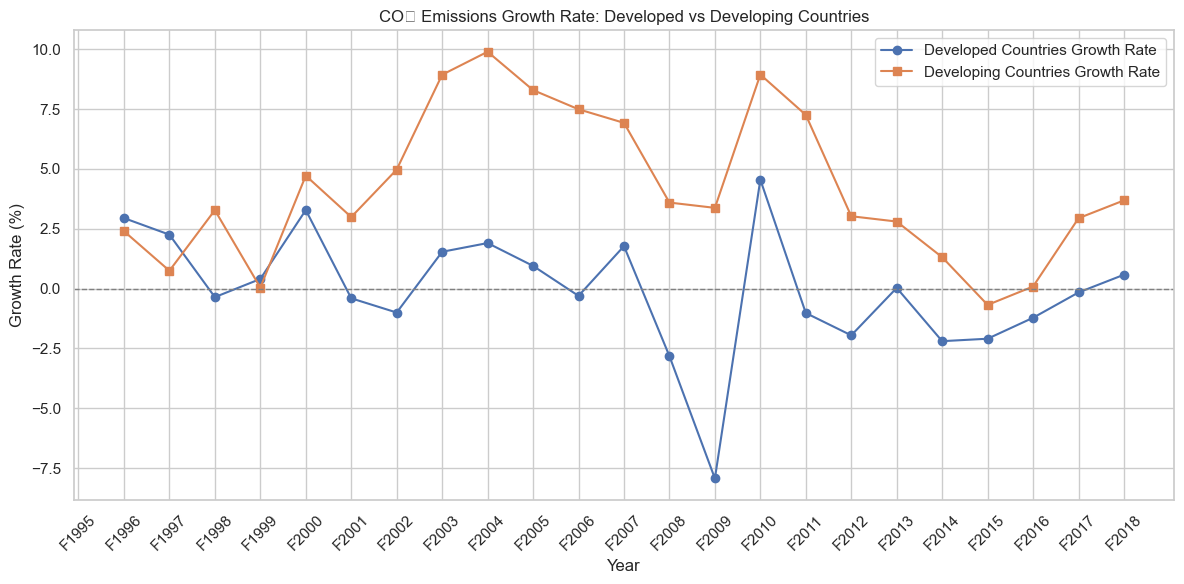

In [18]:
# Calculate percentage growth rates
developed_growth_rate = developed_total.pct_change() * 100
developing_growth_rate = developing_total.pct_change() * 100

# Plot growth rates
plt.figure(figsize=(12, 6))
plt.plot(years, developed_growth_rate, label="Developed Countries Growth Rate", marker="o")
plt.plot(years, developing_growth_rate, label="Developing Countries Growth Rate", marker="s")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("CO₂ Emissions Growth Rate: Developed vs Developing Countries")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ArukshitaDubey\AppData\Local\Temp\ipykernel_19096\1941117098.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


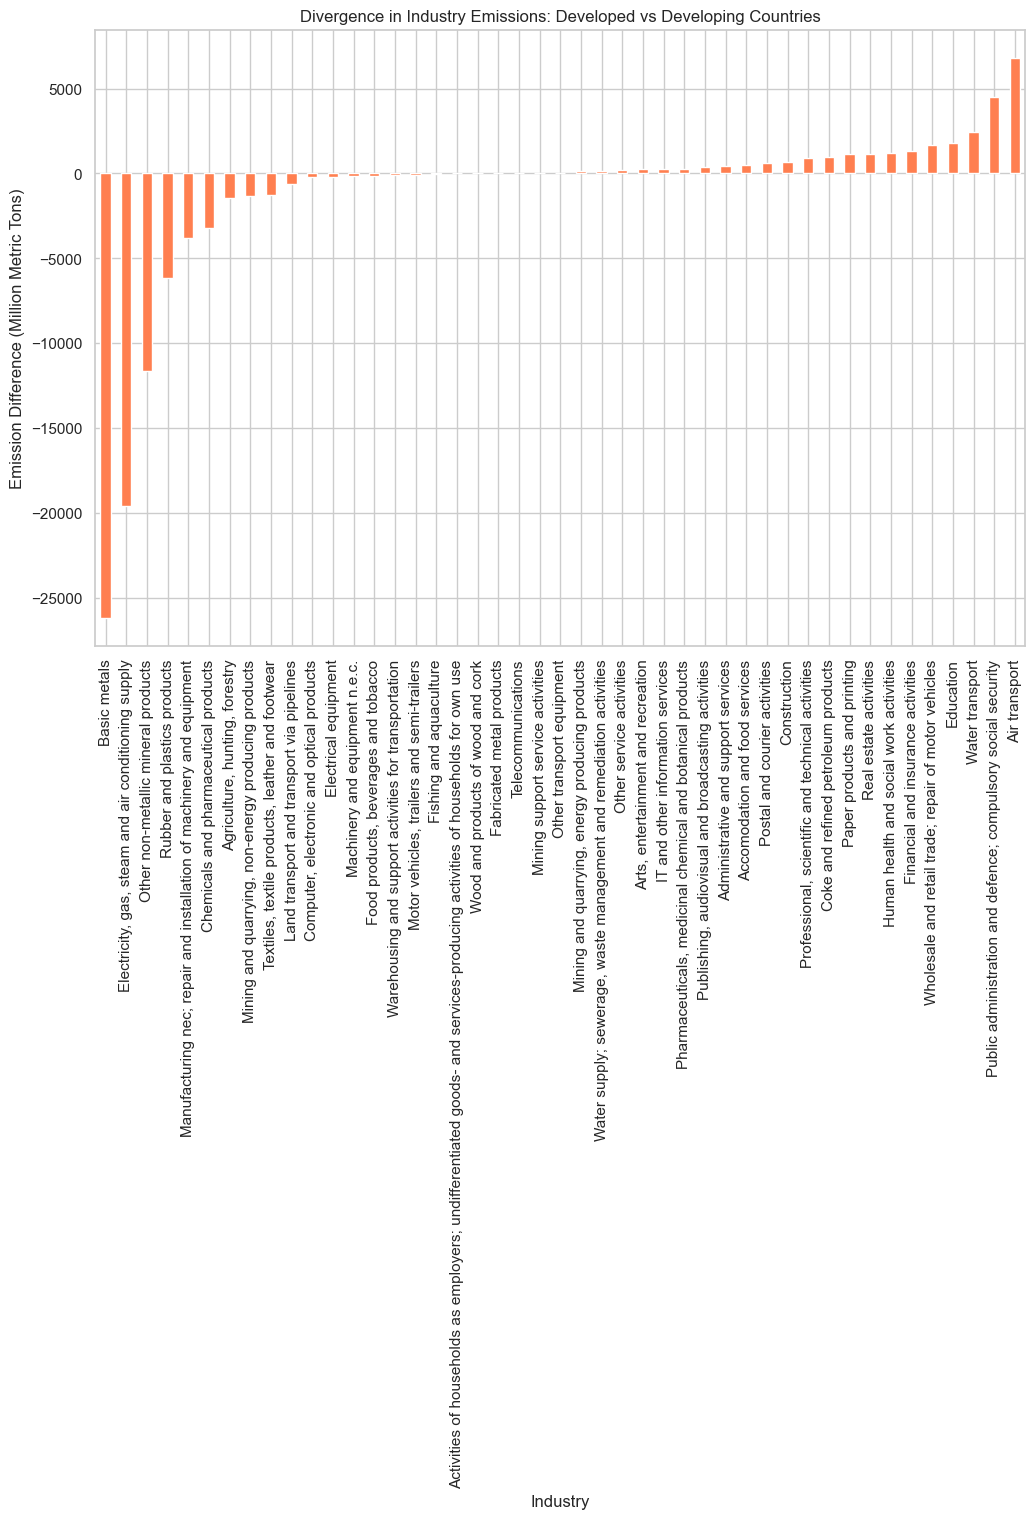

In [19]:
# Calculate differences in industry emissions
industry_diff = (developed_industry_trends.sum(axis=1) - developing_industry_trends.sum(axis=1)).sort_values()

# Plot the divergence
plt.figure(figsize=(12, 8))
industry_diff.plot(kind="bar", color="coral")
plt.title("Divergence in Industry Emissions: Developed vs Developing Countries")
plt.xlabel("Industry")
plt.ylabel("Emission Difference (Million Metric Tons)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()